In [1]:
from sklearn import datasets
from sklearn import model_selection
import numpy as np
import pandas as pd

# SVM

SVM은 데이터 특성의 스케일에 민감

표준 정규 분포로 전처리 해야 함 : 더 좋은 classify를 하고 속도도 빨라짐

In [2]:
from sklearn import preprocessing

In [3]:
scaler = preprocessing.StandardScaler()

In [4]:
scaler.fit_transform( [[1,2],[5,6],[2,3],[6,7],[3,1],[7,5]])

array([[-1.38873015, -0.9258201 ],
       [ 0.46291005,  0.9258201 ],
       [-0.9258201 , -0.46291005],
       [ 0.9258201 ,  1.38873015],
       [-0.46291005, -1.38873015],
       [ 1.38873015,  0.46291005]])

# Hard Margin

초평면으로 모든 것을 구분할 수 있는 경우

maximum margin classifier

In [5]:
from sklearn import svm
from sklearn import metrics

In [6]:
X_train = [[1,2],[5,6],[2,3],[6,7],[3,1],[7,5]]
y_train = [0,1, 0, 1, 0, 1]
X_test = [[1.5, 3.1],[4, 4.5],[6.7, 4.7]]
y_test = [0, 0, 1]

In [7]:
h_model = svm.LinearSVC().fit(X_train, y_train)
    # 훈련 데이터가 크거나 특성 수가 많아도 수행이 빠름
svm.SVC(kernel='linear').fit(X_train, y_train) # 동일
    # 복잡하지만 규모가 크지 않은 데이터의 학습에 적합

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
y_pred = h_model.predict(X_test)

In [9]:
y_pred

array([0, 1, 1])

In [10]:
metrics.accuracy_score(y_test, y_pred)
    # 정확도

0.6666666666666666

In [11]:
h_model.score(X_test, y_test)
    # 정확도

0.6666666666666666

## 시각화

In [12]:
import matplotlib.pyplot as plt

In [13]:
xx = np.linspace(1, 7)

b1 = h_model.coef_[0][0]/h_model.coef_[0][1]
b0 = h_model.intercept_[0]/h_model.coef_[0][1]
yy = -b1*xx - b0

In [14]:
c_set = ['blue','red']
m_set = ['o','D']
l_train_set = ['class0 (train)','class1 (train)']
l_test_set = ['class0 (test)','class1 (test)']
l_pred_set = ['class0 (pred)','class1 (pred)']

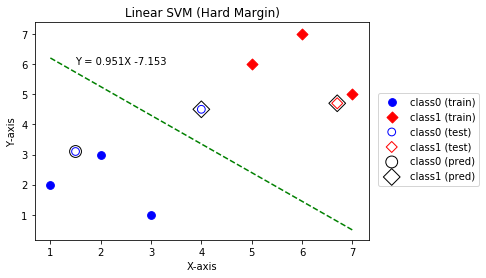

In [15]:
for t in set(y_train):
    xx_pts = [X_train[cnt][0]
              for cnt in range(len(y_train)) if y_train[cnt] == t]
    yy_pts = [X_train[cnt][1]
              for cnt in range(len(y_train)) if y_train[cnt] == t]
    plt.scatter(xx_pts, yy_pts, marker=m_set[t], label=l_train_set[t],\
               color=c_set[t], s=60)

for t in set(y_test):
    xx_pts = [X_test[cnt][0]
              for cnt in range(len(y_test)) if y_test[cnt] == t]
    yy_pts = [X_test[cnt][1]
              for cnt in range(len(y_test)) if y_test[cnt] == t]
    plt.scatter(xx_pts, yy_pts, marker=m_set[t], label=l_test_set[t],\
               edgecolors=c_set[t], facecolors='none', s=60)

for t in set(y_pred):
    xx_pts = [X_test[cnt][0]
              for cnt in range(len(y_pred)) if y_pred[cnt] == t]
    yy_pts = [X_test[cnt][1]
              for cnt in range(len(y_pred)) if y_pred[cnt] == t]
    plt.scatter(xx_pts, yy_pts, marker=m_set[t], label=l_pred_set[t],\
               edgecolors='black', facecolors='none', s=140)

plt.plot(xx, yy, color='green', linestyle='--') 
plt.title('Linear SVM (Hard Margin)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.text(1.5,6,'Y = {0:.3f}X {1:.3f}'.format(b1,b0))
plt.legend(bbox_to_anchor=(1.01, 0.7))
plt.show()

# Soft Margin

실제로 초평면으로 모든 것을 구분할 수는 없음

어느정도 오류를 허용 : soft margin

    하이퍼파라미터 C로 허용할 오류의 수준을 조정
    C가 큼 : margin 작아짐, 오분류율이 낮아짐, 과대적합의 위험
    C가 작음 : margin 커짐, 오분류율이 높아짐, 과소적합의 위험

supprot vector classifier

In [16]:
iris = datasets.load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 2).astype(np.int)

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=29)

In [18]:
model = svm.SVC(C=1, kernel='linear').fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
print(metrics.accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

0.9555555555555556
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [26]:
model2 = svm.SVC(C=100, kernel='linear').fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [27]:
print(metrics.accuracy_score(y_test, y_pred2))

print(metrics.classification_report(y_test, y_pred2))

0.9333333333333333
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.93        45
weighted avg       0.93      0.93      0.93        45



# Multi-class classification

이진 분류만 가능한 방법이라도 이를 조합하여 분류 수행 가능

- one-vs-one 전략 : K개의 클래스중 2개를 뽑아 모든 조합에 대해 수행($_KC_2$)하여 가장 많이 나온 결과를 선택

- one-vs-all 전략 : K개의 클래스 각각별로 포함되는지 안되는지 수행($K$)하여 가장 높은 결과 값을 선택

SVC는 OVO 전략을 이용 (sklearn은 자동으로 해줌)

In [28]:
iris = datasets.load_iris()
X = iris.data[:, (2,3)]
y = iris.target

In [31]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=29)

In [32]:
m_model = svm.SVC(C=1, kernel='linear').fit(X_train, y_train)
y_pred = m_model.predict(X_test)

In [33]:
print(metrics.accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

